In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import random
from deap import base, creator, tools


# Fuzzy Inference System for Pneumonia

In [2]:
def set_mf(func_choice):
    # New Antecedent/Consequent objects hold universe variables and membership
    # functions
    total_area = ctrl.Antecedent(np.arange(0, 100, 0.001), 'total_area')
    conf_score = ctrl.Antecedent(np.arange(0, 100, 0.001), 'conf_score')
    pneumonia_level = ctrl.Consequent(np.arange(0, 10, 0.001), 'pneumonia_level')


    # Custom membership functions can be built interactively with a familiar,
    # Pythonic API
    
    # membership function for - total area - class: very small
    if func_choice[0]==0:
        total_area['very small'] = fuzz.trapmf(total_area.universe, [0, 0, 5, 10])
    elif func_choice[0]==1:
        total_area['very small'] = fuzz.gaussmf(total_area.universe, 0, 3)
    elif func_choice[0]==2:
        total_area['very small'] = fuzz.trimf(total_area.universe, [0, 0, 10])
    elif func_choice[0]==3:
        total_area['very small'] = fuzz.gbellmf(total_area.universe, 4.2, 4, 2.5)
    
        # membership function for - total area - class: small
    if func_choice[1]==0:
        total_area['small'] = fuzz.trapmf(total_area.universe, [5, 10, 15, 20])
    elif func_choice[1]==1:
        total_area['small'] = fuzz.gaussmf(total_area.universe, 12.5, 3)
    elif func_choice[1]==2:
        total_area['small'] = fuzz.trimf(total_area.universe, [5, 12.5, 20])
    elif func_choice[1]==3:
        total_area['small'] = fuzz.gbellmf(total_area.universe, 5, 5, 12.5)    
    

        # membership function for - total area - class: medium
    if func_choice[2]==0:
        total_area['medium'] = fuzz.trapmf(total_area.universe, [15, 20, 25, 30])
    elif func_choice[2]==1:
        total_area['medium'] = fuzz.gaussmf(total_area.universe, 22.5, 3)
    elif func_choice[2]==2:
        total_area['medium'] = fuzz.trimf(total_area.universe, [15, 22.5, 30])
    elif func_choice[2]==3:
        total_area['medium'] = fuzz.gbellmf(total_area.universe, 5, 5, 22.5)    
        
        # membership function for - total area - class: large
    if func_choice[3]==0:
        total_area['large'] = fuzz.trapmf(total_area.universe, [25, 30, 35, 40])
    elif func_choice[3]==1:
        total_area['large'] = fuzz.gaussmf(total_area.universe, 32.5, 3)
    elif func_choice[3]==2:
        total_area['large'] = fuzz.trimf(total_area.universe, [25, 32.5, 40]) 
    elif func_choice[3]==3:
        total_area['large'] = fuzz.gbellmf(total_area.universe, 5, 5, 32.5) 
        
            # membership function for - total area - class: very large
    if func_choice[4]==0:
        total_area['very large'] = fuzz.trapmf(total_area.universe, [35, 40, 100, 100])
    elif func_choice[4]==1:
        total_area['very large'] = fuzz.gaussmf(total_area.universe, 100, 21)
    elif func_choice[4]==2:
        total_area['very large'] = fuzz.trimf(total_area.universe, [35, 100, 100]) 
    elif func_choice[4]==3:
        total_area['very large'] = fuzz.gbellmf(total_area.universe, 32.25, 32.25, 69.75)
        
           # membership function for - conf_score - class: very low
    if func_choice[5]==0:
        conf_score['very low'] = fuzz.trapmf(conf_score.universe, [0, 0, 20, 30])
    elif func_choice[5]==1:
        conf_score['very low'] = fuzz.gaussmf(conf_score.universe, 0, 10) 
    elif func_choice[5]==2:
        conf_score['very low'] = fuzz.trimf(conf_score.universe, [0, 0, 30]) 
    elif func_choice[5]==3:
        conf_score['very low'] = fuzz.gbellmf(conf_score.universe, 15, 4, 7)    
        
        # membership function for - conf_score - class: low
    if func_choice[6]==0:
        conf_score['low'] = fuzz.trapmf(conf_score.universe, [20, 30, 40, 50])
    elif func_choice[6]==1:
        conf_score['low'] = fuzz.gaussmf(conf_score.universe, 35, 6) 
    elif func_choice[6]==2:
        conf_score['low'] = fuzz.trimf(conf_score.universe, [20, 35, 50]) 
    elif func_choice[6]==3:
        conf_score['low'] = fuzz.gbellmf(conf_score.universe, 10, 5, 35)    
        
          # membership function for - conf_score - class: medium
    if func_choice[7]==0:
        conf_score['medium'] = fuzz.trapmf(conf_score.universe, [40, 50, 60, 70])
    elif func_choice[7]==1:
        conf_score['medium'] = fuzz.gaussmf(conf_score.universe, 55, 6)
    elif func_choice[7]==2:
        conf_score['medium'] = fuzz.trimf(conf_score.universe, [40, 55, 70])
    elif func_choice[7]==3:
        conf_score['medium'] = fuzz.gbellmf(conf_score.universe, 10, 5, 55)    
        
            # membership function for - conf_score - class: high
    if func_choice[8]==0:
        conf_score['high'] = fuzz.trapmf(conf_score.universe, [60, 70, 80, 90])
    elif func_choice[8]==1:
        conf_score['high'] = fuzz.gaussmf(conf_score.universe, 75, 6) 
    elif func_choice[8]==2:
        conf_score['high'] = fuzz.trimf(conf_score.universe, [60, 75, 90]) 
    elif func_choice[8]==3:
        conf_score['high'] = fuzz.gbellmf(conf_score.universe, 10, 5, 75)   
        
            # membership function for - conf_score - class: very high
    if func_choice[9]==0:
        conf_score['very high'] = fuzz.trapmf(conf_score.universe, [80, 90, 100, 100])
    elif func_choice[9]==1:
        conf_score['very high'] = fuzz.gaussmf(conf_score.universe, 100, 6)
    elif func_choice[9]==2:
        conf_score['very high'] = fuzz.trimf(conf_score.universe, [80, 100, 100])
    elif func_choice[9]==3:
        conf_score['very high'] = fuzz.gbellmf(conf_score.universe, 9.5, 4.75, 94.5)
        
               # membership function for - conf_score - class: very low
    if func_choice[10]==0:
        pneumonia_level['very low'] = fuzz.trapmf(pneumonia_level.universe, [0, 0, 1.5, 2.5])
    elif func_choice[10]==1:
        pneumonia_level['very low'] = fuzz.gaussmf(pneumonia_level.universe, 0, 0.9) 
    elif func_choice[10]==2:
        pneumonia_level['very low'] = fuzz.trimf(pneumonia_level.universe, [0, 0, 2.5])  
    elif func_choice[10]==3:
        pneumonia_level['very low'] = fuzz.gbellmf(pneumonia_level.universe, 1.1, 3.5, 0.6) 

        # membership function for - conf_score - class: low
    if func_choice[11]==0:
        pneumonia_level['low'] = fuzz.trapmf(pneumonia_level.universe, [1.5, 2.5, 3.5, 4.5])
    elif func_choice[11]==1:
        pneumonia_level['low'] = fuzz.gaussmf(pneumonia_level.universe, 3.0, 0.6) 
    elif func_choice[11]==2:
        pneumonia_level['low'] = fuzz.trimf(pneumonia_level.universe, [1.5, 3.0, 4.5])  
    elif func_choice[11]==3:
        pneumonia_level['low'] = fuzz.gbellmf(pneumonia_level.universe, 1, 5, 3)  
        
        # membership function for - conf_score - class: medium
    if func_choice[12]==0:
        pneumonia_level['medium'] = fuzz.trapmf(pneumonia_level.universe, [3.5, 4.5, 5.5, 6.5])
    elif func_choice[12]==1:
        pneumonia_level['medium'] = fuzz.gaussmf(pneumonia_level.universe, 5, 0.6)  
    elif func_choice[12]==2:
        pneumonia_level['medium'] = fuzz.trimf(pneumonia_level.universe, [3.5, 5, 6.5])
    elif func_choice[12]==3:
        pneumonia_level['medium'] = fuzz.gbellmf(pneumonia_level.universe, 1, 5, 5)  
        
          # membership function for - conf_score - class: high
    if func_choice[13]==0:
        pneumonia_level['high'] = fuzz.trapmf(pneumonia_level.universe, [5.5, 6.5, 7.5, 8.5]) 
    elif func_choice[13]==1:
        pneumonia_level['high'] = fuzz.gaussmf(pneumonia_level.universe, 7.0, 0.6) 
    elif func_choice[13]==2:
        pneumonia_level['high'] = fuzz.trimf(pneumonia_level.universe, [5.5, 7.0, 8.5]) 
    elif func_choice[13]==3:
        pneumonia_level['high'] = fuzz.gbellmf(pneumonia_level.universe, 1, 5, 7)  
        
              # membership function for - conf_score - class: very high
    if func_choice[14]==0:
        pneumonia_level['very high'] = fuzz.trapmf(pneumonia_level.universe, [7.5, 8.5, 10.0, 10.0])
    elif func_choice[14]==1:
        pneumonia_level['very high'] = fuzz.gaussmf(pneumonia_level.universe, 10, 0.8) 
    elif func_choice[14]==2:
        pneumonia_level['very high'] = fuzz.trimf(pneumonia_level.universe, [7.5, 10.0, 10.0])
    elif func_choice[14]==3:
        pneumonia_level['very high'] = fuzz.gbellmf(pneumonia_level.universe, 1.2, 6, 9.2) 
    return total_area, conf_score, pneumonia_level
    

In [3]:
def set_rule(total_area, conf_score, pneumonia_level):
    rule1 = ctrl.Rule(total_area['very small'] & conf_score['very low'], pneumonia_level['very low'])
    rule2 = ctrl.Rule(total_area['very small'] & conf_score['low'], pneumonia_level['very low'])
    rule3 = ctrl.Rule(total_area['very small'] & conf_score['medium'], pneumonia_level['very low'])
    rule4 = ctrl.Rule(total_area['very small'] & conf_score['high'], pneumonia_level['medium'])
    rule5 = ctrl.Rule(total_area['very small'] & conf_score['very high'], pneumonia_level['high'])
    rule6 = ctrl.Rule(total_area['small'] & conf_score['very low'], pneumonia_level['very low'])
    rule7 = ctrl.Rule(total_area['small'] & conf_score['low'], pneumonia_level['very low'])
    rule8 = ctrl.Rule(total_area['small'] & conf_score['medium'], pneumonia_level['very low'])
    rule9 = ctrl.Rule(total_area['small'] & conf_score['high'], pneumonia_level['medium'])
    rule10 = ctrl.Rule(total_area['small'] & conf_score['very high'], pneumonia_level['high'])
    rule11 = ctrl.Rule(total_area['medium'] & conf_score['very low'], pneumonia_level['very low'])
    rule12 = ctrl.Rule(total_area['medium'] & conf_score['low'], pneumonia_level['very low'])
    rule13 = ctrl.Rule(total_area['medium'] & conf_score['medium'], pneumonia_level['low'])
    rule14 = ctrl.Rule(total_area['medium'] & conf_score['high'], pneumonia_level['high'])
    rule15 = ctrl.Rule(total_area['medium'] & conf_score['very high'], pneumonia_level['very high'])
    rule16 = ctrl.Rule(total_area['large'] & conf_score['very low'], pneumonia_level['very low'])
    rule17 = ctrl.Rule(total_area['large'] & conf_score['low'], pneumonia_level['very low'])
    rule18 = ctrl.Rule(total_area['large'] & conf_score['medium'], pneumonia_level['medium'])
    rule19 = ctrl.Rule(total_area['large'] & conf_score['high'], pneumonia_level['very high'])
    rule20 = ctrl.Rule(total_area['large'] & conf_score['very high'], pneumonia_level['very high'])
    rule21 = ctrl.Rule(total_area['very large'] & conf_score['very low'], pneumonia_level['very low'])
    rule22 = ctrl.Rule(total_area['very large'] & conf_score['low'], pneumonia_level['very low'])
    rule23 = ctrl.Rule(total_area['very large'] & conf_score['medium'], pneumonia_level['medium'])
    rule24 = ctrl.Rule(total_area['very large'] & conf_score['high'], pneumonia_level['very high'])
    rule25 = ctrl.Rule(total_area['very large'] & conf_score['very high'], pneumonia_level['very high'])                  

    pneumonia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15
                                         , rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

    pneumonia = ctrl.ControlSystemSimulation(pneumonia_ctrl)
    
    return pneumonia

In [4]:
def create_FIS(func_choice = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3]):
    total_area, conf_score, pneumonia_level = set_mf(func_choice)
    inference_sys = set_rule(total_area, conf_score, pneumonia_level)
    return {'inference':inference_sys, 'area':total_area, 'score':conf_score, 'level': pneumonia_level}

In [5]:
FIS = create_FIS([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:

pneumonia = FIS['inference']
total_area = FIS['area']
conf_score = FIS['score']
pneumonia_level = FIS['level']

In [7]:
def inference_output(pneumonia, input1, input2):
    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
#     print(input1, input2)
    pneumonia.input['total_area'] = input1
    pneumonia.input['conf_score'] = input2

    # Crunch the numbers
    pneumonia.compute()
    
    output = pneumonia.output['pneumonia_level']
    
    return pneumonia, output

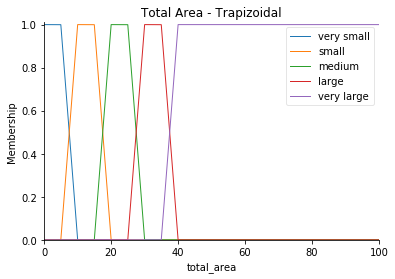

In [8]:
import matplotlib.pyplot as plt
total_area.view()
plt.title('Total Area - Trapizoidal')
plt.show()

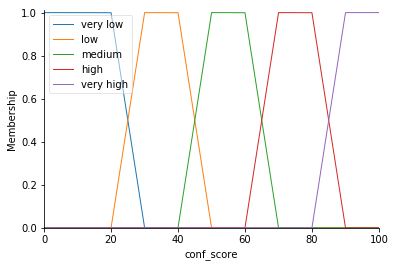

In [9]:
conf_score.view()

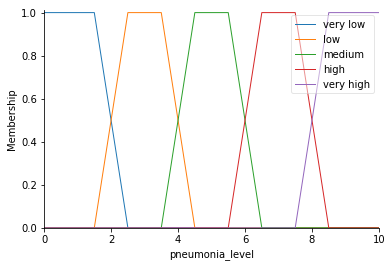

In [10]:
pneumonia_level.view()

In [11]:
import random as rd
ls = []
for i in range(1,101):
    if i<50: b = rd.randrange(0,50)
    else: b = rd.randrange(50,100)
    a = rd.randrange(1,80)
    _,c = inference_output(pneumonia, a, b)
    d = [a,b,c]
    ls.append(d)
print(ls)

[[76, 3, 1.0208333333333317], [76, 40, 1.0208333333333317], [52, 27, 1.084496124031004], [20, 31, 1.0208333333333317], [18, 11, 1.1068181818181801], [78, 17, 1.0208333333333317], [24, 29, 1.0414634146341382], [17, 2, 1.1068181818181801], [53, 20, 1.0208333333333317], [6, 9, 1.0626984126983956], [65, 25, 1.129629629629631], [68, 38, 1.0208333333333317], [37, 14, 1.1068181818181801], [16, 45, 1.7251366120219105], [32, 11, 1.0208333333333317], [66, 28, 1.0626984126983956], [24, 13, 1.0208333333333317], [55, 3, 1.0208333333333317], [63, 30, 1.0208333333333317], [66, 21, 1.0414634146341382], [56, 45, 3.1666666666666643], [71, 7, 1.0208333333333317], [69, 35, 1.0208333333333317], [53, 25, 1.129629629629631], [8, 49, 1.1068181818181801], [77, 29, 1.0414634146341382], [55, 32, 1.0208333333333317], [11, 42, 1.0626984126983956], [68, 5, 1.0208333333333317], [2, 11, 1.0208333333333317], [46, 6, 1.0208333333333317], [24, 32, 1.0208333333333317], [7, 40, 1.1068181818181801], [66, 30, 1.020833333333

7.000000000000059


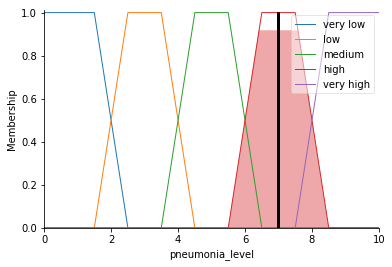

In [12]:
# print(pneumonia.output['pneumonia_level'])
pneumonia,output = inference_output(pneumonia, 5.41, 92.3)
print(output)
pneumonia_level.view(sim=pneumonia)

# Genetic Algorithm for Fuzzy Function Tuning

In [13]:
random.seed(13)
min_max_weight = -1.0
generation = 20

In [14]:
def error_calculate(pneumonia):
    
    pneumonia,output = inference_output(pneumonia, 5.41, 92.3)
    data_df = pd.read_csv('../input/pneumonia_data.csv')
    data = np.array(data_df.values)
    avg_error = 0.0
    length = data.shape[0]
    for i in range(length):
        input1 = data[i][0]
        input2 = data[i][1]
        expected_output = data[i][2]
        output = inference_output(pneumonia, input1, input2)[1]
        error = abs(expected_output-output)
        avg_error += error
#         print('error: ',error)

    avg_error/=length 
    return avg_error

    

In [15]:
def eval_func(individual):
    FIS = create_FIS(individual)
    pneumonia = FIS['inference']
    error = error_calculate(pneumonia)
    return [error]

In [16]:
eval_func([0, 3, 3, 2, 3, 2, 1, 0, 3, 2, 3, 1, 3, 0, 1])

[0.18930742533335085]

In [17]:
creator.create("FitnessMin", base.Fitness, weights=(min_max_weight,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [18]:
tbx = base.Toolbox()

In [19]:
INDIVIDUAL_SIZE = 15

tbx.register("attr_int", random.randint, 0, 3)
tbx.register("individual", 
             tools.initRepeat, 
             creator.Individual,
             tbx.attr_int, 
             n=INDIVIDUAL_SIZE)

tbx.register("population", tools.initRepeat, list, tbx.individual)

In [20]:
tbx.register("evaluate", eval_func)

tbx.register("mate", tools.cxTwoPoint)
tbx.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
tbx.register("select", tools.selTournament, tournsize=3)
# tbx.register("select", tools.selRoulette)

In [21]:
def set_fitness(population):
    fitnesses = [ 
        (individual, tbx.evaluate(individual)) 
        for individual in population 
    ]
    
    print(fitnesses)

    for individual, fitness in fitnesses:
        individual.fitness.values = fitness
        
def pull_stats(population, iteration=1):
    fitnesses = [ individual.fitness.values[0] for individual in population ]
    return {
        'i': iteration,
        'mu': np.mean(fitnesses),
        'std': np.std(fitnesses),
        'max': np.max(fitnesses),
        'min': np.min(fitnesses)
    }

In [22]:
def sortSecond(val): 
    return val[1] 

In [23]:
## create random population,
population = tbx.population(n=6)

## set fitness,
set_fitness(population)

[([2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 3, 1, 0], [0.30402073402598]), ([2, 1, 0, 2, 3, 3, 1, 2, 2, 1, 3, 3, 2, 3, 2], [0.11608168040604014]), ([0, 2, 2, 3, 1, 3, 3, 1, 2, 1, 1, 2, 2, 2, 3], [0.29675631754566595]), ([2, 2, 3, 1, 3, 1, 1, 1, 2, 1, 0, 3, 3, 3, 0], [0.15732511909045377]), ([3, 0, 1, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 1, 1], [0.15030444058511733]), ([3, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 3], [0.16677181861494034])]


In [24]:
## quick look at the initial population,
population[:5]

[[2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 3, 1, 0],
 [2, 1, 0, 2, 3, 3, 1, 2, 2, 1, 3, 3, 2, 3, 2],
 [0, 2, 2, 3, 1, 3, 3, 1, 2, 1, 1, 2, 2, 2, 3],
 [2, 2, 3, 1, 3, 1, 1, 1, 2, 1, 0, 3, 3, 3, 0],
 [3, 0, 1, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 1, 1]]

In [25]:
## globals,
stats = []

In [26]:
best_lst = []
min_fitness = 1000
best_ind = []
iteration = 1
while iteration <= generation:
    
    current_population = list(map(tbx.clone, population))
    
    offspring = []
    for _ in range(10):
        i1, i2 = np.random.choice(range(len(population)), size=2, replace=False)

        offspring1, offspring2 = \
            tbx.mate(population[i1], population[i2])

        offspring.append(tbx.mutate(offspring1)[0])
        offspring.append(tbx.mutate(offspring2)[0])  
    
    for child in offspring:
        current_population.append(child)

    ## reset fitness,
    set_fitness(current_population)

    population[:] = tbx.select(current_population, len(population))
    
    print(population)
    
    ## set fitness on individuals in the population,
    statistics = pull_stats(population, iteration)
    stats.append(statistics)
    
    
    print('generation: ',iteration)
    for ind in population:
        fit_val = eval_func(ind)[0]
        print(ind, ', fitness value: ',fit_val)
        if fit_val<min_fitness:
            min_fitness = fit_val
            best_ind = ind
            
    best_lst.append((min_fitness,best_ind))
    
    iteration += 1
    
print('Summary: ')
print('(min_fit,best_individual) per iteration:')
print(best_lst)
print('min_fit per intereation: ')
print([ s[0] for s in best_lst ])

[([2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 3, 1, 0], [0.30402073402598]), ([2, 1, 0, 2, 3, 3, 1, 2, 2, 1, 3, 3, 2, 3, 2], [0.11608168040604014]), ([0, 2, 2, 3, 1, 3, 3, 1, 2, 1, 1, 2, 2, 2, 3], [0.29675631754566595]), ([2, 2, 3, 1, 3, 1, 1, 1, 2, 1, 0, 3, 3, 3, 0], [0.15732511909045377]), ([3, 0, 1, 1, 3, 3, 2, 1, 3, 2, 2, 1, 2, 1, 1], [0.15030444058511733]), ([3, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 3], [0.16677181861494034]), ([3, 0, 1, 3, 2, 3, 1, 3, 2, 1, 2, 0, 3, 1, 1], [0.18723976772660222]), ([3, 3, 1, 1, 3, 2, 3, 0, 2, 2, 0, 0, 1, 2, 2], [0.1182743242877345]), ([1, 1, 3, 1, 1, 2, 2, 3, 1, 1, 0, 1, 1, 3, 0], [0.270524062478801]), ([1, 3, 2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 0, 1, 1], [0.3052719405798526]), ([1, 2, 3, 1, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2, 3], [0.1986361925924413]), ([3, 0, 1, 3, 2, 3, 1, 3, 2, 1, 2, 0, 3, 1, 1], [0.18723976772660222]), ([2, 3, 2, 3, 1, 0, 2, 3, 1, 0, 2, 2, 3, 1, 1], [0.23922393182119156]), ([1, 3, 2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 0, 1, 1], [0.3052719405798526]), 

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

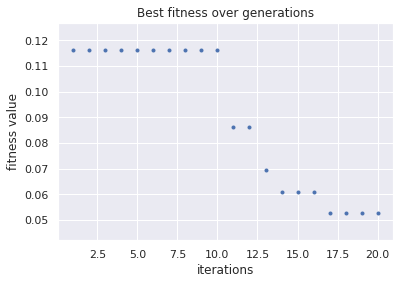

In [28]:
_ = plt.scatter(range(1, len(stats)+1), [ s[0] for s in best_lst ], marker='.')

_ = plt.title('Best fitness over generations')
_ = plt.xlabel('iterations')
_ = plt.ylabel('fitness value')

plt.show()